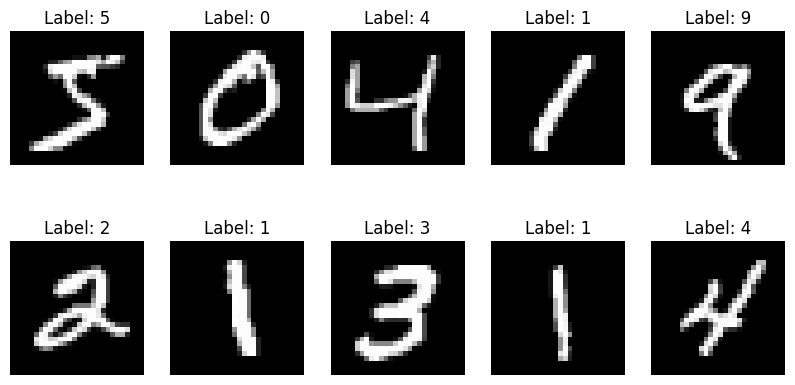

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Wczytanie danych MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizacja do zakresu [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Rozszerzenie wymiarów (kanały dla CNN)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Wizualizacja pierwszych kilku obrazów
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].squeeze(), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


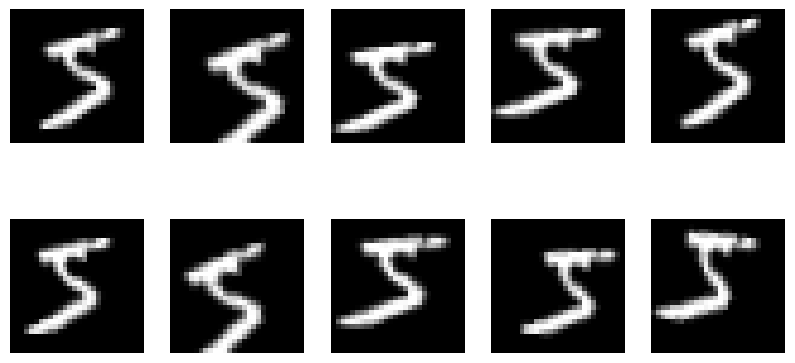

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,        # Obrót do 15 stopni
    width_shift_range=0.1,   # Przesunięcie poziome
    height_shift_range=0.1,  # Przesunięcie pionowe
    shear_range=0.1,         # Przesunięcie perspektywy
    zoom_range=0.1,          # Przybliżenie
    horizontal_flip=False,   # Odbicie lustrzane (nie ma sensu dla cyfr)
    fill_mode='nearest'      # Wypełnienie pikseli pustych
)

# Przykładowe augmentacje dla jednego obrazu
example = X_train[0]
example = np.expand_dims(example, axis=0)

plt.figure(figsize=(10, 5))
i = 0
for batch in datagen.flow(example, batch_size=1):
    plt.subplot(2, 5, i + 1)
    plt.imshow(batch[0].squeeze(), cmap="gray")
    plt.axis("off")
    i += 1
    if i >= 10:  # Wyświetlenie 10 przykładów
        break
plt.show()


In [5]:
# Model prosty sieci neuronowej
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Trening na oryginalnym zbiorze
history_orig = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


/home/evani/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-12-09 17:41:41.473865: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5


2024-12-09 17:41:42.650234: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8665 - loss: 0.4683 - val_accuracy: 0.9602 - val_loss: 0.1354
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9555 - loss: 0.1482 - val_accuracy: 0.9697 - val_loss: 0.0983
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9682 - loss: 0.1072 - val_accuracy: 0.9741 - val_loss: 0.0834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.0892 - val_accuracy: 0.9769 - val_loss: 0.0787
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9760 - loss: 0.0737 - val_accuracy: 0.9784 - val_loss: 0.0752


In [6]:
# Generator augmentowanych danych
datagen.fit(X_train)

# Trening z Data Augmentation
history_aug = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                        epochs=5, validation_data=(X_test, y_test))


Epoch 1/5


/home/evani/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8294 - loss: 0.6004 - val_accuracy: 0.9709 - val_loss: 0.0936
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9023 - loss: 0.3216 - val_accuracy: 0.9752 - val_loss: 0.0832
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9163 - loss: 0.2762 - val_accuracy: 0.9747 - val_loss: 0.0836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9231 - loss: 0.2592 - val_accuracy: 0.9748 - val_loss: 0.0833
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9244 - loss: 0.2473 - val_accuracy: 0.9746 - val_loss: 0.0827


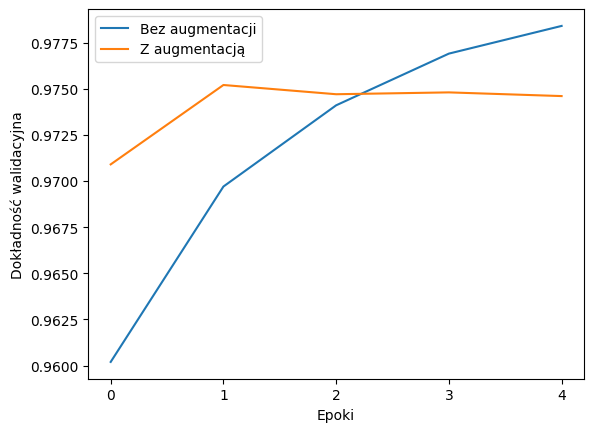

In [11]:
epochs = range(0, len(history_orig.history['val_accuracy']))
plt.plot(history_orig.history['val_accuracy'], label='Bez augmentacji')
plt.plot(history_aug.history['val_accuracy'], label='Z augmentacją')
plt.xlabel('Epoki')
plt.ylabel('Dokładność walidacyjna')
plt.xticks(epochs) 
plt.legend()
plt.show()
